In [92]:
suppressMessages({library(Seurat)
library(tidyverse)
library(ggrepel)
library(ggalluvial)
library(corrplot)})

In [106]:
PRO <- readRDS("/SGRNJ02/RandD4/Integratedanalysis/RD20060301/20201126/dmulti/rename/BEGW.diff_PRO.rds")

In [111]:
##violint
Idents(PRO)<-"orig.ident"
P<-ggplot(PRO@meta.data,aes(x=orig.ident,y=nCount_RNA,fill=orig.ident)) + geom_violin(draw_quantiles = T) +geom_boxplot(width = 0.05)+labs(y="nUMI")+ylim(0,60000)+theme_classic()
pdf(file = "nUMI_violint.pdf",width =12,height = 9)
print(P)
dev.off()
P<-ggplot(PRO@meta.data,aes(x=orig.ident,y=nFeature_RNA,fill=orig.ident)) + geom_violin(draw_quantiles = T) +geom_boxplot(width = 0.05)+labs(y="nGene")+ylim(0,8000)+theme_classic()
pdf(file = "nGene_violint.pdf",width =12,height = 9)
print(P)
dev.off()

Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


png 
  2

png 
  2

In [107]:
##corplot
Idents(PRO)<-"new_ident"
freq_table <- prop.table(x=table(PRO@active.ident ,PRO@meta.data[,"sample"]),margin=2)
freM <- as.matrix(freq_table)
celltype<-rownames(freM)
freM<-apply(freM,2,as.numeric)
freM<-data.frame(freM, celltype)
R1 <- cor(freM$BE_Gaowan,freM$BEGW)
P<-ggplot(data = freM,aes(x = BE_Gaowan,y = BEGW,color = celltype)) + geom_point()+geom_text_repel(aes(label=celltype),color = "black",size=4,vjust=3,hjust=-0.5) + geom_abline(color="black") +geom_text(aes(x=0.25, y=0.25,label= paste("R","=",signif(R1,3),seq=""),vjust=-30,hjust=2),color="black")+theme_classic()+theme(legend.text=element_text(size=12))
pdf(file = "cor.pdf",width =12,height = 9)
print(P)
dev.off()

png 
  2

In [108]:
PRO@meta.data=unite(PRO@meta.data,'ident1',orig.ident,new_ident,sep='_',remove = F)

In [112]:
head(PRO@meta.data)

,ident1,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mito,integrated_snn_res.0.3,seurat_clusters,new_ident
,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>
BE_Gaowan_AAACATCGAAACATCGAAGACGGA,BE_Gaowan_Sertoli cells,BE_Gaowan,7554,1959,BE_Gaowan,0.007678051,8,8,Sertoli cells
BE_Gaowan_AAACATCGAACCGAGAAACCGAGA,BE_Gaowan_Round spermatids,BE_Gaowan,8941,3036,BE_Gaowan,0.007269880,3,3,Round spermatids
BE_Gaowan_AAACATCGAACGTGATACGCTCGA,BE_Gaowan_Elongating spermatids,BE_Gaowan,8128,1434,BE_Gaowan,0.007750984,2,2,Elongating spermatids
BE_Gaowan_AAACATCGACATTGGCATGCCTAA,BE_Gaowan_Elongating spermatids,BE_Gaowan,4991,823,BE_Gaowan,0.003606492,0,0,Elongating spermatids
BE_Gaowan_AAACATCGACATTGGCCATCAAGT,BE_Gaowan_Elongating spermatids,BE_Gaowan,10594,2069,BE_Gaowan,0.001132717,1,1,Elongating spermatids
BE_Gaowan_AAACATCGACGCTCGAACTATGCA,BE_Gaowan_Round spermatids,BE_Gaowan,5318,2272,BE_Gaowan,0.009402031,3,3,Round spermatids


In [104]:
##dotplot&heatmap
Idents(PRO)<-"sample"
PROBE_G<-subset(PRO,idents = 'BE_Gaowan')
PROBEG<-subset(PRO,idents = 'BEGW')
Idents(PRO)<-"ident1"
Idents(PROBE_G)<-"ident1"
Idents(PROBEG)<-"ident1"
cd_genes <- c('Tnp1','Prm1','Acrv1','Sun5','Psma8','Piwil1','Sox9','Cldn11','Dmrt1','Stra8','Fabp3','Hsd3b1')
P<-DotPlot(object = PRO, features = cd_genes)
pdf(file = "BE_dotplot.pdf",width =15,height = 12)
print(P)
dev.off()
P<-DotPlot(object = PROBE_G, features = cd_genes)
pdf(file = "BE_Gaowan_dotplot.pdf",width =15,height = 12)
print(P)
dev.off()
P<-DotPlot(object = PROBEG, features = cd_genes)
pdf(file = "BEGW_dotplot.pdf",width =15,height = 12)
print(P)
dev.off()
P<-DoHeatmap(object = PRO, features = cd_genes)
pdf(file = "BE_heatmap.pdf",width =15,height = 12)
print(P)
dev.off()
P<-DoHeatmap(object = PROBE_G, features = cd_genes)
pdf(file = "BE_Gaowan_heatmap.pdf",width =15,height = 12)
print(P)
dev.off()
P<-DoHeatmap(object = PROBEG, features = cd_genes)
pdf(file = "BEGW_heatmap.pdf",width =15,height = 12)
print(P)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

Warning message in plot.window(xlim, ylim, log = log, ...):
“"palette" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"palette" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"palette" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"palette" is not a graphical parameter”


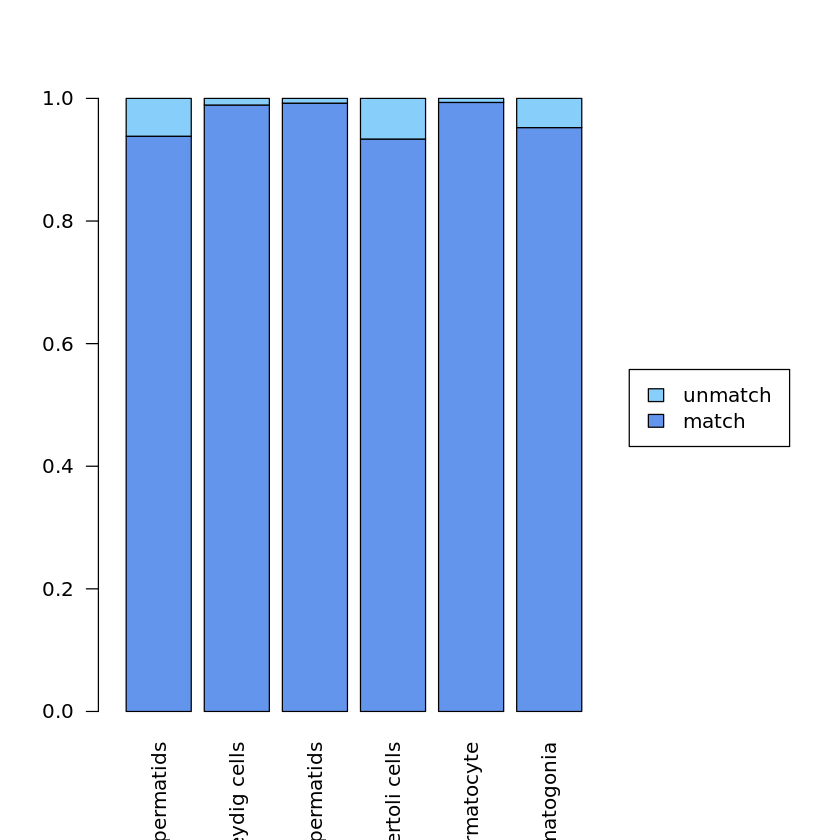

In [114]:
##matchpercent
Idents(PRO)<-"orig.ident"
PRO1<-subset(PRO,idents='BE_Gaowan')
PRO2<-subset(PRO,idents='BEGW')
barcodes <- sapply(rownames(PRO1@meta.data), function(x) unlist(strsplit(x, "_"))[3])
PRO1 <- AddMetaData(object = PRO1, metadata = barcodes, col.name = 'barcodes')
barcodes <- sapply(rownames(PRO2@meta.data), function(x) unlist(strsplit(x, "_"))[2])
PRO2 <- AddMetaData(object = PRO2, metadata = barcodes, col.name = 'barcodes')
barcode1<-PRO1@meta.data$barcodes
barcode2<-PRO2@meta.data$barcodes
barcode=intersect(barcode1, barcode2)
PRO1@meta.data$rowname=rownames(PRO1@meta.data)
rownames(PRO1@meta.data)=PRO1@meta.data$barcodes
PRO1@meta.data$match = 'unmatch'
PRO1@meta.data[barcode,'match'] = 'match'
rownames(PRO1@meta.data)=PRO1@meta.data$rowname
PRO2@meta.data$rowname=rownames(PRO2@meta.data)
rownames(PRO2@meta.data)=PRO2@meta.data$barcodes
PRO2@meta.data$match = 'unmatch'
PRO2@meta.data[barcode,'match'] = 'match'
rownames(PRO2@meta.data)=PRO2@meta.data$rowname
PRO3<-merge(x=PRO1,y=PRO2)
Idents(PRO3)<-"match"
freq_table <- prop.table(x=table(PRO3@active.ident,PRO3@meta.data[,"new_ident"]),margin=2)
clustcol<-c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")
col2<-colorRampPalette(c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DarkGreen","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#E6E6FA","#FFDAB9"))   
pdf(file = 'matchPercentPerCell.pdf')
barplot(height=freq_table,width = 6,xlim=c(1,60),legend = rownames(freq_table),args.legend = list(x = "right"),las=2,xlab="",palette='Spectral_r',col=c("#6495ED","#87CEFA"))
dev.off()

In [124]:
head(PRO1@meta.data)

,ident1,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mito,integrated_snn_res.0.3,seurat_clusters,new_ident,barcodes,rowname,match
,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
BE_Gaowan_AAACATCGAAACATCGAAGACGGA,BE_Gaowan_Sertoli cells,BE_Gaowan,7554,1959,BE_Gaowan,0.007678051,8,8,Sertoli cells,AAACATCGAAACATCGAAGACGGA,BE_Gaowan_AAACATCGAAACATCGAAGACGGA,match
BE_Gaowan_AAACATCGAACCGAGAAACCGAGA,BE_Gaowan_Round spermatids,BE_Gaowan,8941,3036,BE_Gaowan,0.007269880,3,3,Round spermatids,AAACATCGAACCGAGAAACCGAGA,BE_Gaowan_AAACATCGAACCGAGAAACCGAGA,match
BE_Gaowan_AAACATCGAACGTGATACGCTCGA,BE_Gaowan_Elongating spermatids,BE_Gaowan,8128,1434,BE_Gaowan,0.007750984,2,2,Elongating spermatids,AAACATCGAACGTGATACGCTCGA,BE_Gaowan_AAACATCGAACGTGATACGCTCGA,match
BE_Gaowan_AAACATCGACATTGGCATGCCTAA,BE_Gaowan_Elongating spermatids,BE_Gaowan,4991,823,BE_Gaowan,0.003606492,0,0,Elongating spermatids,AAACATCGACATTGGCATGCCTAA,BE_Gaowan_AAACATCGACATTGGCATGCCTAA,match
BE_Gaowan_AAACATCGACATTGGCCATCAAGT,BE_Gaowan_Elongating spermatids,BE_Gaowan,10594,2069,BE_Gaowan,0.001132717,1,1,Elongating spermatids,AAACATCGACATTGGCCATCAAGT,BE_Gaowan_AAACATCGACATTGGCCATCAAGT,match
BE_Gaowan_AAACATCGACGCTCGAACTATGCA,BE_Gaowan_Round spermatids,BE_Gaowan,5318,2272,BE_Gaowan,0.009402031,3,3,Round spermatids,AAACATCGACGCTCGAACTATGCA,BE_Gaowan_AAACATCGACGCTCGAACTATGCA,match


In [125]:
rownames(PRO1@meta.data)=PRO1@meta.data$barcodes
rownames(PRO2@meta.data)=PRO2@meta.data$barcodes
meta1<-PRO1@meta.data[barcode,]
meta2<-PRO2@meta.data[barcode,]
meta1<-meta1['new_ident']
meta2<-meta2['new_ident']
colnames(meta1)[1] <- 'ident2'
meta1$barcodes=rownames(meta1)
meta2$barcodes=rownames(meta2)
meta3<-merge(x=meta1,y=meta2,by="barcodes")

In [126]:
head(meta3)

,barcodes,ident2,new_ident
,<chr>,<fct>,<fct>
1,AAACATCGAAACATCGAAGACGGA,Sertoli cells,Sertoli cells
2,AAACATCGAACCGAGAAACCGAGA,Round spermatids,Round spermatids
3,AAACATCGAACGTGATACGCTCGA,Elongating spermatids,Elongating spermatids
4,AAACATCGACATTGGCATGCCTAA,Elongating spermatids,Elongating spermatids
5,AAACATCGACATTGGCCATCAAGT,Elongating spermatids,Elongating spermatids
6,AAACATCGACGCTCGAACTATGCA,Round spermatids,Round spermatids


In [136]:
pdf(file = 'sankey.pdf')
ggplot(data = meta3,
       aes(axis1 = ident2, axis2 = new_ident)) +
  scale_x_discrete(limits = c("BE_Gaowan", "BEGW"), expand = c(.01, .05)) +
  geom_alluvium(aes(fill = ident2)) +
  geom_stratum() + geom_label(stat = "stratum", infer.label = TRUE,size=3) +
  #coord_polar()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  ggtitle("cell number in each sample")
dev.off()


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message:
“The parameter `infer.label` is deprecated.
Use `aes(label = after_stat(stratum))`.”


png 
  2